# Donation Game Perfect and Limited Memory

**Imports**

In [1]:
import pandas as pd

import tqdm

In [2]:
import glob 

In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
import matplotlib.colors as colors

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
import numpy as np

In [7]:
plt.rcParams["font.weight"] = "normal"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 11

plt.rcParams["font.family"] = "Arial"

## Analysis for low and high benefit

In [8]:
reds, blues = matplotlib.colormaps.get_cmap("Reds"), matplotlib.colormaps.get_cmap("Blues")

cmaps = [blues, reds]

In [9]:
expected_dfs = [pd.read_csv(f"../to_archieve/perfect_memory/clean_c_1_b_{b_val}_stochastic_0.csv") 
                for b_val in [3, 10]]

In [10]:
last_round_dfs = [pd.read_csv(f"../to_archieve/limited_memory/clean_last_round_b_{b_val}.csv") 
                  for b_val in [3, 10]]

In [11]:
heatmaps, extents = [], []

for exp, stoch in zip(expected_dfs, last_round_dfs):
    
    for df in [exp, stoch]:
        
        ps, qs = [], []
        for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
            for _ in range(int(v)):
                ps.append(p)
                qs.append(q)


        heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)
    
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        
        heatmaps.append(heatmap)
        extents.append(extent)

In [12]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

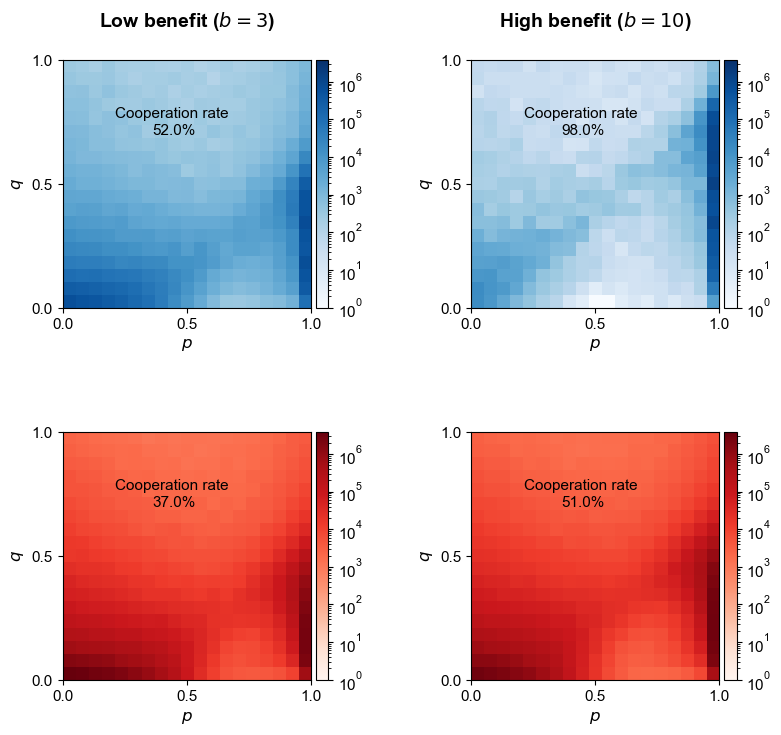

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 7.5))


cooperation_rates = [round(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)), 2) 
                     for df in expected_dfs]

cooperation_rates += [round(sum(df['average cooperation rate'] * (df['frequencies'] / (5 * 10 ** 7))), 2) 
                     for df in last_round_dfs]

for i, heatmap in enumerate([heatmaps[0], heatmaps[2], heatmaps[1], heatmaps[3]]):
    
    index = int(i / 2), (i % 2)


    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[int(i / 2)],
                            norm=colors.LogNorm(vmin=min_, vmax=max_))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 3))
    axes[index].set_yticks(np.linspace(0, 1, 3));
    axes[index].set_xlabel("$p$", fontweight='normal', fontsize=12)
    axes[index].set_ylabel("$q$", fontweight='normal', fontsize=12)
    
    axes[index].text(0.45, 0.7, "Cooperation rate \n" + str(cooperation_rates[i] * 100) + '%',
                 horizontalalignment='center')

axes[0, 0].set_title("Low benefit ($b = 3$)", fontweight='bold', fontsize=14, y=1.1);
axes[0, 1].set_title("High benefit ($b = 10$)", fontweight='bold', fontsize=14, y=1.1);

fig.tight_layout();

plt.subplots_adjust(wspace=.5, hspace=.5)

fig.savefig("../paper/static/population_heatmaps.pdf", bbox_inches='tight')

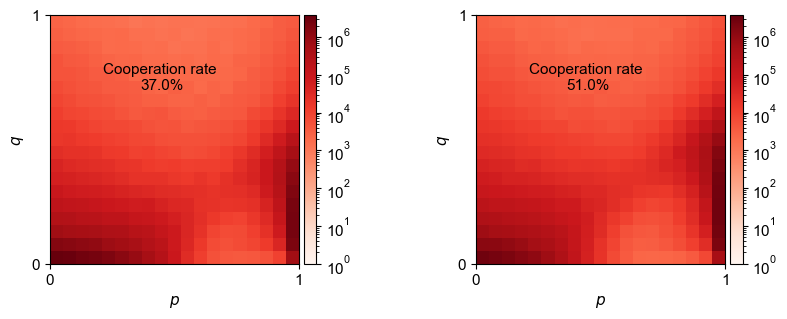

In [17]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 7.5))


cooperation_rates = [round(sum(df['average cooperation rate'] * (df['frequencies'] / (5 * 10 ** 7))), 2) 
                     for df in last_round_dfs]

for i, heatmap in enumerate([heatmaps[1], heatmaps[-1]]):
    
    index = (i % 2)

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[1],
                            norm=colors.LogNorm(vmin=min_, vmax=max_))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2));
    axes[index].set_xlabel("$p$")
    axes[index].set_ylabel("$q$")
    
    axes[index].text(0.45, 0.7, "Cooperation rate \n" + str(cooperation_rates[i] * 100) + '%',
                 horizontalalignment='center')

fig.tight_layout();

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.6, hspace=None)

# fig.savefig("../paper/static/one_interaction_last_round_payoffs_main.pdf", bbox_inches='tight')

## Analysis over parameters $b$ and $\beta$

### Benefit analysis

In [19]:
csv_files_prf = [f'../to_archieve/perfect_memory/clean_c_1_b_{b}_stochastic_0.csv' for b in range(2, 11)]
csv_files_lmt = [f'../to_archieve/limited_memory/clean_last_round_b_{b}.csv' for b in range(2, 11)]

In [20]:
dfs_perfect = []

for file, b in zip(csv_files_prf, range(2, 11)):
    df = pd.read_csv(file)
    df['b'] = b
    dfs_perfect.append(df)

In [21]:
dfs_limited = []

for file, b in zip(csv_files_lmt, range(2, 11)):
    df = pd.read_csv(file)
    df['b'] = b
    dfs_limited.append(df)

In [22]:
cooperation_rates_b_perfect = []
cooperation_rates_b_limited = []

for exp, stoch in zip(dfs_perfect, dfs_limited):
    
    cooperation_rates_b_perfect.append(
        sum(exp['average cooperation rate'] * (exp['frequencies'] / sum(exp['frequencies'])))
    )
    cooperation_rates_b_limited.append(
        sum(stoch['average cooperation rate'] * (stoch['frequencies'] / sum(stoch['frequencies'])))
    )

In [23]:
%%capture

generosity_b_perfect = []
generosity_b_limited = []

for exp, stoch in zip(dfs_perfect, dfs_limited):

    _, bins, _ = plt.hist(exp['p'], bins=19);
    generosity_b_perfect.append(np.mean(exp[exp['p'] >= bins[-2]]['q']))
    
    _, bins, _ = plt.hist(stoch['p'], bins=19);
    generosity_b_limited.append(np.mean(stoch[stoch['p'] >= bins[-2]]['q']))

### Strength of selection analysis 

In [24]:
betas = [10 ** -4, 10 ** -3, 10 ** - 2, 10 ** - 1, 10 ** 0, 10 ** 1, 10 ** 2]

csv_files_prf = [f'../to_archieve/perfect_memory/clean_beta_{beta}_stochastic_0.csv' for beta in betas]

csv_files_lr = [f'../to_archieve/limited_memory/clean_beta_{beta}_stochastic_1.csv' for beta in betas]

In [25]:
dfs_perfect = []

for file, beta in zip(csv_files_prf, betas):
    df = pd.read_csv(file)
    df['beta'] = beta
    dfs_perfect.append(df)

In [26]:
dfs_limited = []

for file, beta in zip(csv_files_lr, betas):
    df = pd.read_csv(file)
    df['beta'] = beta
    dfs_limited.append(df)

In [27]:
cooperation_rates_beta_limited = []
cooperation_rates_beta_perfect = []

for exp, stoch in zip(dfs_perfect, dfs_limited):
    
    cooperation_rates_beta_perfect.append(
        sum(exp['average cooperation rate'] * (exp['frequencies'] / sum(exp['frequencies'])))
    )
    cooperation_rates_beta_limited.append(
        sum(stoch['average cooperation rate'] * (stoch['frequencies'] / sum(stoch['frequencies'])))
    )

In [28]:
%%capture

generosity_beta_perfect = []
generosity_beta_limited = []

for exp, stoch in zip(dfs_perfect, dfs_limited):

    _, bins, _ = plt.hist(exp['p'], bins=19);
    generosity_beta_perfect.append(np.mean(exp[exp['p'] >= bins[-2]]['q']))
    
#     _, bins, _ = plt.hist(stoch['p'], bins=19);
    generosity_beta_limited.append(np.mean(stoch[stoch['p'] >= bins[-2]]['q']))
    

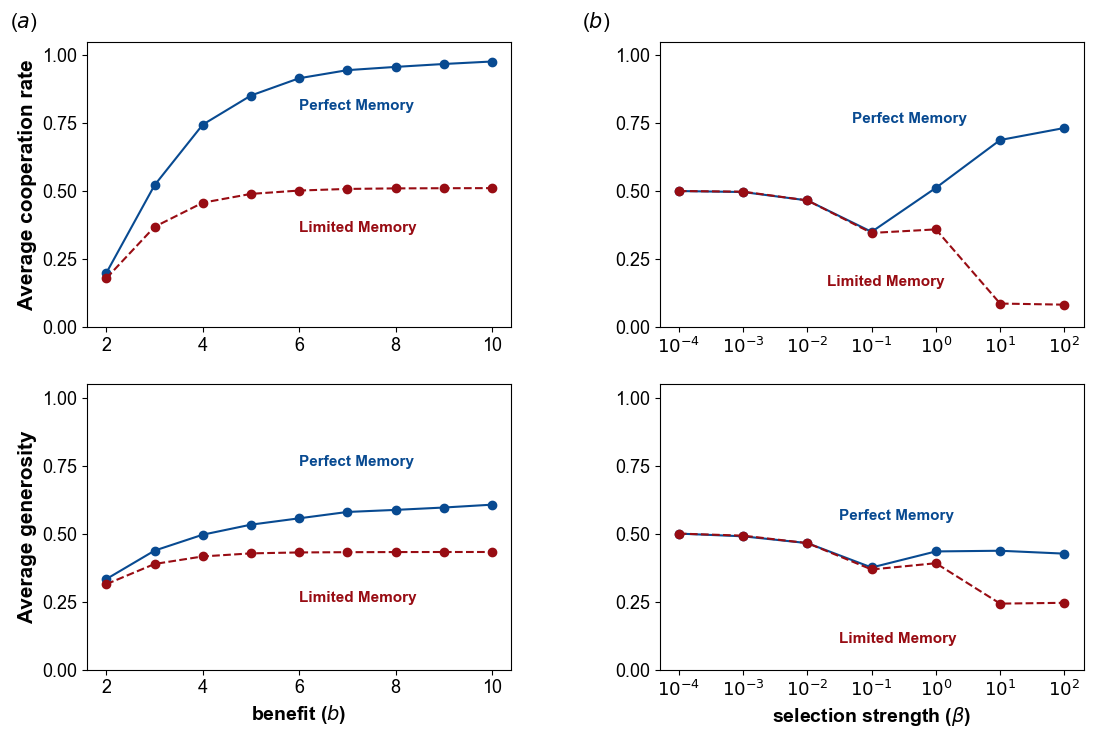

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 7.5))

# Cooperation Rates For b

axes[0, 0].plot(range(2, 11), cooperation_rates_b_perfect, "-o", color=blues(0.9));
axes[0, 0].plot(range(2, 11), cooperation_rates_b_limited, "--o", color=reds(.9));

axes[0, 0].set_ylabel('Average cooperation rate', weight="bold", fontsize=15);


axes[0, 0].text(6, .8, "Perfect Memory", fontsize=11, color=blues(.9), fontweight='bold')
axes[0, 0].text(6, .35, "Limited Memory", fontsize=11, color=reds(.9), fontweight='bold')

# Generosity Rates For b

axes[1, 0].plot(range(2, 11), generosity_b_perfect, "-o", color=blues(0.9));
axes[1, 0].plot(range(2, 11), generosity_b_limited, "--o", color=reds(.9));
axes[1, 0].set_xlabel("benefit ($b$)", weight="bold", fontsize=14);
axes[1, 0].set_ylabel('Average generosity', weight="bold", fontsize=15);

axes[1, 0].text(6, .75, "Perfect Memory", fontsize=11, color=blues(.9), fontweight='bold')
axes[1, 0].text(6, .25, "Limited Memory", fontsize=11, color=reds(.9), fontweight='bold')

# Cooperation Rates For beta

axes[0, 1].plot(range(1, 8), cooperation_rates_beta_perfect, "-o", color=blues(0.9));
axes[0, 1].plot(range(1, 8), cooperation_rates_beta_limited, "--o", color=reds(0.9));
axes[0, 1].set_xticks([1, 2, 3, 4, 5, 6, 7]);
axes[(0, 1)].set_xticklabels([r"$10^{-4}$", r"$10^{-3}$",
                      r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);

axes[(0, 1)].text(3.7, .75, "Perfect Memory", fontsize=11, color=blues(.9),fontweight='bold')
axes[(0, 1)].text(3.3, .15, "Limited Memory", fontsize=11, color=reds(.9), fontweight='bold')


# Generosity Rates For beta

axes[(1, 1)].plot(range(1, 8), generosity_beta_perfect, "-o", color=blues(0.9));
axes[(1, 1)].plot(range(1, 8), generosity_beta_limited, "--o", color=reds(.9));
axes[(1, 1)].set_xlabel(r'selection strength ($\beta$)', weight="bold", fontsize=14);

axes[(1, 1)].text(3.5, .55, "Perfect Memory", fontsize=11, color=blues(.9), fontweight='bold')
axes[(1, 1)].text(3.5, .1, "Limited Memory", fontsize=11, color=reds(.9), fontweight='bold')

axes[(1, 1)].set_xticks([1, 2, 3, 4, 5, 6, 7]);
axes[(1, 1)].set_xticklabels([r"$10^{-4}$", r"$10^{-3}$",
                      r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);

for i in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    axes[i].tick_params(axis='both', which='major', labelsize=13)
    axes[i].set_ylim(0, 1.05);
    axes[i].set_yticks([0, .25, .5, .75, 1])
#     for ax in [axes[i].spines["right"], axes[i].spines["top"]]:
#         ax.set_visible(False);
        

axes[(0, 0)].text(0, 1.1, "($a$)", fontsize=15,)
axes[(0, 1)].text(-.5, 1.1, "($b$)", fontsize=15,)
        
    
        
plt.tight_layout();

plt.subplots_adjust(wspace=.35, hspace=.2)

plt.savefig("../paper/static/cooperation_rate_over_b_and_beta.pdf")